In [72]:
import os
import pandas as pd

input_file_path = r"ebd_LK-33_revbul_202201_202301_unv_smp_relOct-2024.txt"
output_file_path = r"raw_dataset.csv"

try:
    df = pd.read_csv(input_file_path, sep="\t", header=0, low_memory=False)
    df.to_csv(output_file_path, index=False)

    print(f"Raw dataset saved successfully at {output_file_path}")

except Exception as e:
    print(f"An error occurred: {e}")


Raw dataset saved successfully at raw_dataset.csv


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"raw_dataset.csv"

df = pd.read_csv(file_path)

df.head()

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
0,URN:CornellLabOfOrnithology:EBIRD:OBS1309546250,2023-10-23 19:22:46.607435,24523,species,NaN,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,7.0,1,NaN,0,1,0,NaN,"Clear, sunny afternoon. The birds were observe...",NaN,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS1309539456,2023-10-17 03:09:42.732041,24523,species,NaN,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,2.0,1,NaN,0,1,0,NaN,"Clear, sunny morning.",NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS1334048727,2023-10-23 19:23:29.964364,24523,species,NaN,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,1.0,1,G7821490,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS1334049465,2023-10-22 02:59:01.388532,24523,species,NaN,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,5.0,1,G7821481,0,1,0,NaN,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS1333992668,2023-10-22 02:59:00.197386,24523,species,NaN,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,5.0,1,G7821481,0,1,0,NaN,NaN,NaN,NaN


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GLOBAL UNIQUE IDENTIFIER    484 non-null    object 
 1   LAST EDITED DATE            484 non-null    object 
 2   TAXONOMIC ORDER             484 non-null    int64  
 3   CATEGORY                    484 non-null    object 
 4   TAXON CONCEPT ID            0 non-null      float64
 5   COMMON NAME                 484 non-null    object 
 6   SCIENTIFIC NAME             484 non-null    object 
 7   SUBSPECIES COMMON NAME      0 non-null      float64
 8   SUBSPECIES SCIENTIFIC NAME  0 non-null      float64
 9   EXOTIC CODE                 0 non-null      float64
 10  OBSERVATION COUNT           484 non-null    object 
 11  BREEDING CODE               0 non-null      float64
 12  BREEDING CATEGORY           0 non-null      float64
 13  BEHAVIOR CODE               0 non-n

In [75]:
for col in df.select_dtypes(include='object').columns: # to understand categorical features
    print(col)
    print(df[col].unique())

GLOBAL UNIQUE IDENTIFIER
['URN:CornellLabOfOrnithology:EBIRD:OBS1309546250'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1309539456'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1334048727'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1334049465'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1333992668'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1334041080'
 'URN:CornellLabOfOrnithology:EBIRD:OBS2605046040'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1334035935'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1333985683'
 'URN:CornellLabOfOrnithology:EBIRD:OBS2605045987'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1332920976'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1334063976'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1334055839'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1346750284'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1334063930'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1334049547'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1373378927'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1389577764'
 'URN:CornellLabOfOrnithology:EBIRD:OBS1385085204'
 'URN:

In [76]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['OBSERVATION COUNT']))]
categorical_features

for feature in categorical_features:
    print('For feature, {} , it has {} categories'.format(feature,len(df[feature].unique())))

For feature, GLOBAL UNIQUE IDENTIFIER , it has 484 categories
For feature, LAST EDITED DATE , it has 451 categories
For feature, CATEGORY , it has 1 categories
For feature, COMMON NAME , it has 1 categories
For feature, SCIENTIFIC NAME , it has 1 categories
For feature, COUNTRY , it has 1 categories
For feature, COUNTRY CODE , it has 1 categories
For feature, STATE , it has 1 categories
For feature, STATE CODE , it has 1 categories
For feature, COUNTY , it has 8 categories
For feature, COUNTY CODE , it has 8 categories
For feature, IBA CODE , it has 3 categories
For feature, LOCALITY , it has 127 categories
For feature, LOCALITY ID , it has 136 categories
For feature, LOCALITY TYPE , it has 2 categories
For feature, OBSERVATION DATE , it has 168 categories
For feature, TIME OBSERVATIONS STARTED , it has 233 categories
For feature, OBSERVER ID , it has 120 categories
For feature, SAMPLING EVENT IDENTIFIER , it has 484 categories
For feature, PROTOCOL TYPE , it has 5 categories
For featu

In [77]:
for categorical_feature in categorical_features:
    print(df.groupby(['OBSERVATION COUNT',categorical_feature]).size())

OBSERVATION COUNT  GLOBAL UNIQUE IDENTIFIER                       
1                  URN:CornellLabOfOrnithology:EBIRD:OBS1339180991    1
                   URN:CornellLabOfOrnithology:EBIRD:OBS1384988417    1
                   URN:CornellLabOfOrnithology:EBIRD:OBS1389578155    1
                   URN:CornellLabOfOrnithology:EBIRD:OBS1399729959    1
                   URN:CornellLabOfOrnithology:EBIRD:OBS1400593804    1
                                                                     ..
X                  URN:CornellLabOfOrnithology:EBIRD:OBS1831477890    1
                   URN:CornellLabOfOrnithology:EBIRD:OBS1868212725    1
                   URN:CornellLabOfOrnithology:EBIRD:OBS1934025766    1
                   URN:CornellLabOfOrnithology:EBIRD:OBS2003386374    1
                   URN:CornellLabOfOrnithology:EBIRD:OBS2589046379    1
Length: 484, dtype: int64
OBSERVATION COUNT  LAST EDITED DATE          
1                  2022-05-20 23:09:13.21729     1
                  

In [78]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['OBSERVATION COUNT']))]
print('There are ', len(numerical_features), 'numerical variables')

# visualising
df[numerical_features].head()

There are  25 numerical variables


,TAXONOMIC ORDER,TAXON CONCEPT ID,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,BREEDING CODE,BREEDING CATEGORY,BEHAVIOR CODE,AGE/SEX,BCR CODE,...,EFFORT DISTANCE KM,EFFORT AREA HA,NUMBER OBSERVERS,ALL SPECIES REPORTED,HAS MEDIA,APPROVED,REVIEWED,REASON,SPECIES COMMENTS,Unnamed: 49
0,24523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.50,NaN,7.0,1,0,1,0,NaN,NaN,NaN
1,24523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.50,NaN,2.0,1,0,1,0,NaN,NaN,NaN
2,24523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.30,NaN,1.0,1,0,1,0,NaN,NaN,NaN
3,24523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.29,NaN,5.0,1,0,1,0,NaN,NaN,NaN
4,24523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.29,NaN,5.0,1,0,1,0,NaN,NaN,NaN


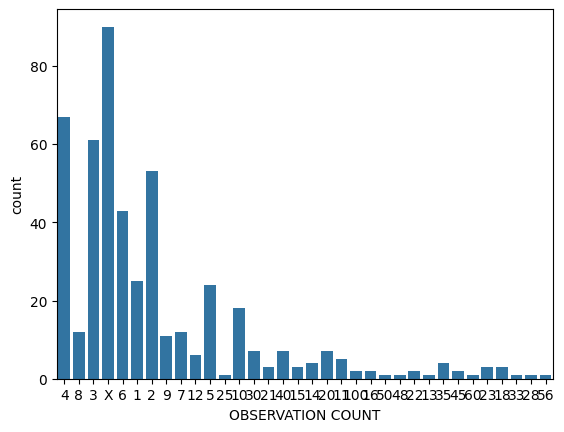

In [79]:
sns.countplot(x='OBSERVATION COUNT',data=df)
plt.show()

In [80]:
df['OBSERVATION COUNT'].groupby(df['OBSERVATION COUNT']).count()

,OBSERVATION COUNT
OBSERVATION COUNT,
1,25
10,18
100,2
11,5
12,6
13,1
14,4
15,3
16,2


In [81]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

TAXON CONCEPT ID 1.0  % missing values
SUBSPECIES COMMON NAME 1.0  % missing values
SUBSPECIES SCIENTIFIC NAME 1.0  % missing values
EXOTIC CODE 1.0  % missing values
BREEDING CODE 1.0  % missing values
BREEDING CATEGORY 1.0  % missing values
BEHAVIOR CODE 1.0  % missing values
AGE/SEX 1.0  % missing values
IBA CODE 0.7665  % missing values
BCR CODE 1.0  % missing values
USFWS CODE 1.0  % missing values
ATLAS BLOCK 1.0  % missing values
TIME OBSERVATIONS STARTED 0.0124  % missing values
DURATION MINUTES 0.0269  % missing values
EFFORT DISTANCE KM 0.1798  % missing values
EFFORT AREA HA 0.9959  % missing values
NUMBER OBSERVERS 0.0124  % missing values
GROUP IDENTIFIER 0.5992  % missing values
REASON 1.0  % missing values
TRIP COMMENTS 0.9587  % missing values
SPECIES COMMENTS 1.0  % missing values
Unnamed: 49 1.0  % missing values
No missing value found


In [82]:
for column in df.columns:
    print(column,df[column].nunique())

GLOBAL UNIQUE IDENTIFIER 484
LAST EDITED DATE 451
TAXONOMIC ORDER 1
CATEGORY 1
TAXON CONCEPT ID 0
COMMON NAME 1
SCIENTIFIC NAME 1
SUBSPECIES COMMON NAME 0
SUBSPECIES SCIENTIFIC NAME 0
EXOTIC CODE 0
OBSERVATION COUNT 34
BREEDING CODE 0
BREEDING CATEGORY 0
BEHAVIOR CODE 0
AGE/SEX 0
COUNTRY 1
COUNTRY CODE 1
STATE 1
STATE CODE 1
COUNTY 8
COUNTY CODE 8
IBA CODE 2
BCR CODE 0
USFWS CODE 0
ATLAS BLOCK 0
LOCALITY 127
LOCALITY ID 136
LOCALITY TYPE 2
LATITUDE 135
LONGITUDE 135
OBSERVATION DATE 168
TIME OBSERVATIONS STARTED 232
OBSERVER ID 120
SAMPLING EVENT IDENTIFIER 484
PROTOCOL TYPE 5
PROTOCOL CODE 5
PROJECT CODE 1
DURATION MINUTES 177
EFFORT DISTANCE KM 218
EFFORT AREA HA 2
NUMBER OBSERVERS 8
ALL SPECIES REPORTED 2
GROUP IDENTIFIER 68
HAS MEDIA 2
APPROVED 1
REVIEWED 1
REASON 0
TRIP COMMENTS 20
SPECIES COMMENTS 0
Unnamed: 49 0


In [83]:
df2=df.copy()
df2.head()

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
0,URN:CornellLabOfOrnithology:EBIRD:OBS1309546250,2023-10-23 19:22:46.607435,24523,species,NaN,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,7.0,1,NaN,0,1,0,NaN,"Clear, sunny afternoon. The birds were observe...",NaN,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS1309539456,2023-10-17 03:09:42.732041,24523,species,NaN,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,2.0,1,NaN,0,1,0,NaN,"Clear, sunny morning.",NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS1334048727,2023-10-23 19:23:29.964364,24523,species,NaN,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,1.0,1,G7821490,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS1334049465,2023-10-22 02:59:01.388532,24523,species,NaN,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,5.0,1,G7821481,0,1,0,NaN,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS1333992668,2023-10-22 02:59:00.197386,24523,species,NaN,Red-vented Bulbul,Pycnonotus cafer,NaN,NaN,NaN,...,5.0,1,G7821481,0,1,0,NaN,NaN,NaN,NaN


In [84]:
df2.shape

(484, 50)

In [85]:
df2.drop(['GLOBAL UNIQUE IDENTIFIER'],axis=1, inplace=True)

In [86]:
df2.drop(['LAST EDITED DATE'],axis=1, inplace=True)

In [87]:
df2.drop(['TAXONOMIC ORDER'],axis=1, inplace=True)

In [88]:
df2.drop(['CATEGORY'],axis=1, inplace=True)

In [89]:
df2.drop(['TAXON CONCEPT ID'],axis=1, inplace=True)

In [90]:
df2.drop(['COMMON NAME'],axis=1, inplace=True)

In [91]:
df2.drop(['SCIENTIFIC NAME'],axis=1, inplace=True)

In [92]:
df2.drop(['SUBSPECIES COMMON NAME'],axis=1, inplace=True)

In [93]:
df2.drop(['SUBSPECIES SCIENTIFIC NAME'],axis=1, inplace=True)

In [94]:
df2.drop(['EXOTIC CODE'],axis=1, inplace=True)

In [95]:
df2.drop(['BREEDING CODE'],axis=1, inplace=True)

In [96]:
df2.drop(['BREEDING CATEGORY'],axis=1, inplace=True)

In [97]:
df2.drop(['BEHAVIOR CODE'],axis=1, inplace=True)

In [98]:
df2.drop(['AGE/SEX'],axis=1, inplace=True)

In [99]:
df2.drop(['COUNTRY'],axis=1, inplace=True)

In [100]:
df2.drop(['COUNTRY CODE'],axis=1, inplace=True)

In [101]:
df2.drop(['STATE'],axis=1, inplace=True)

In [102]:
df2.drop(['STATE CODE'],axis=1, inplace=True)

In [103]:
df2.drop(['COUNTY CODE'],axis=1, inplace=True)

In [104]:
df2.drop(['IBA CODE'],axis=1, inplace=True)

In [105]:
df2.drop(['BCR CODE'],axis=1, inplace=True)

In [106]:
df2.drop(['USFWS CODE'],axis=1, inplace=True)

In [107]:
df2.drop(['ATLAS BLOCK'],axis=1, inplace=True)

In [108]:
df2.drop(['LOCALITY TYPE'],axis=1, inplace=True)

In [109]:
df2.drop(['LOCALITY ID'],axis=1, inplace=True)

In [110]:
df2.drop(['OBSERVER ID'],axis=1, inplace=True)

In [111]:
df2.drop(['SAMPLING EVENT IDENTIFIER'],axis=1, inplace=True)

In [112]:
df2.drop(['PROTOCOL TYPE'],axis=1, inplace=True)

In [113]:
df2.drop(['PROTOCOL CODE'],axis=1, inplace=True)

In [114]:
df2.drop(['PROJECT CODE'],axis=1, inplace=True)

In [115]:
df2.drop(['DURATION MINUTES'],axis=1, inplace=True)

In [116]:
df2.drop(['EFFORT DISTANCE KM'],axis=1, inplace=True)

In [117]:
df2.drop(['EFFORT AREA HA'],axis=1, inplace=True)

In [118]:
df2.drop(['NUMBER OBSERVERS'],axis=1, inplace=True)

In [119]:
df2.drop(['ALL SPECIES REPORTED'],axis=1, inplace=True)

In [120]:
df2.drop(['GROUP IDENTIFIER'],axis=1, inplace=True)

In [121]:
df2.drop(['HAS MEDIA'],axis=1, inplace=True)

In [122]:
df2.drop(['APPROVED'],axis=1, inplace=True)

In [123]:
df2.drop(['REVIEWED'],axis=1, inplace=True)

In [124]:
df2.drop(['REASON'],axis=1, inplace=True)

In [125]:
df2.drop(['TRIP COMMENTS'],axis=1, inplace=True)

In [126]:
df2.drop(['SPECIES COMMENTS'],axis=1, inplace=True)

In [127]:
df2.drop(['Unnamed: 49'],axis=1, inplace=True)

In [128]:
df3 = df2.copy()

print(df3.columns)

Index(['OBSERVATION COUNT', 'COUNTY', 'LOCALITY', 'LATITUDE', 'LONGITUDE',
       'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED'],
      dtype='object')


In [129]:
df3['OBSERVATION DATE'] = pd.to_datetime(df3['OBSERVATION DATE'], format='mixed')

# extract month
df3['Month'] = df3['OBSERVATION DATE'].dt.strftime('%B')

df3.drop(columns=['OBSERVATION DATE'], inplace=True)

print(df3.head())


  OBSERVATION COUNT       COUNTY  \
0                 4  Ambalantota   
1                 4  Ambalantota   
2                 8  Ambalantota   
3                 3  Ambalantota   
4                 3  Ambalantota   

                                            LOCALITY  LATITUDE  LONGITUDE  \
0                          Kalametiya Bird Sanctuary  6.079940  80.932975   
1                                     Villa Tanderra  6.076015  80.932945   
2                            Gurupokuna - Kalametiya  6.083702  80.932344   
3  Hungama - Gurupokuna Road, Southern Province, ...  6.096865  80.924300   
4  Hungama - Gurupokuna Road, Southern Province, ...  6.096865  80.924300   

  TIME OBSERVATIONS STARTED     Month  
0                  16:30:00   January  
1                  06:30:00   January  
2                  15:42:00  February  
3                  15:28:00  February  
4                  15:28:00  February  


In [130]:
df3['TIME OBSERVATIONS STARTED'] = pd.to_datetime(df3['TIME OBSERVATIONS STARTED'], format='%H:%M:%S', errors='coerce').dt.time

def classify_time(time_value):
    if pd.isna(time_value):  # Handle missing values
        return 'Unknown'
    elif time_value >= pd.to_datetime('05:00:00').time() and time_value < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time_value >= pd.to_datetime('12:00:00').time() and time_value < pd.to_datetime('17:00:00').time():
        return 'Day'
    elif time_value >= pd.to_datetime('17:00:00').time() and time_value < pd.to_datetime('20:00:00').time():
        return 'Evening'
    else:
        return 'Night'

#classification function
df3['Time'] = df3['TIME OBSERVATIONS STARTED'].apply(classify_time)


df3.drop(columns=['TIME OBSERVATIONS STARTED'], inplace=True)
print(df3.head())


  OBSERVATION COUNT       COUNTY  \
0                 4  Ambalantota   
1                 4  Ambalantota   
2                 8  Ambalantota   
3                 3  Ambalantota   
4                 3  Ambalantota   

                                            LOCALITY  LATITUDE  LONGITUDE  \
0                          Kalametiya Bird Sanctuary  6.079940  80.932975   
1                                     Villa Tanderra  6.076015  80.932945   
2                            Gurupokuna - Kalametiya  6.083702  80.932344   
3  Hungama - Gurupokuna Road, Southern Province, ...  6.096865  80.924300   
4  Hungama - Gurupokuna Road, Southern Province, ...  6.096865  80.924300   

      Month     Time  
0   January      Day  
1   January  Morning  
2  February      Day  
3  February      Day  
4  February      Day  


In [131]:
# Replace 'X' with 'No' and all other values with 'Yes'
df3['OBSERVATION'] = df3['OBSERVATION COUNT'].apply(lambda x: 'No' if x == 'X' else 'Yes')

# Drop the original 'OBSERVATION COUNT' column
df3.drop(columns=['OBSERVATION COUNT'], inplace=True)

# Display updated dataframe
print(df3.head())


        COUNTY                                           LOCALITY  LATITUDE  \
0  Ambalantota                          Kalametiya Bird Sanctuary  6.079940   
1  Ambalantota                                     Villa Tanderra  6.076015   
2  Ambalantota                            Gurupokuna - Kalametiya  6.083702   
3  Ambalantota  Hungama - Gurupokuna Road, Southern Province, ...  6.096865   
4  Ambalantota  Hungama - Gurupokuna Road, Southern Province, ...  6.096865   

   LONGITUDE     Month     Time OBSERVATION  
0  80.932975   January      Day         Yes  
1  80.932945   January  Morning         Yes  
2  80.932344  February      Day         Yes  
3  80.924300  February      Day         Yes  
4  80.924300  February      Day         Yes  


In [132]:
# one-hot encoding for categorical columns
cat_columns = ['COUNTY', 'LOCALITY', 'Month', 'Time']
dummies_df = pd.get_dummies(df3[cat_columns], prefix=cat_columns, drop_first=True)

df3 = pd.concat([df3.drop(cat_columns, axis=1), dummies_df], axis=1)

# Convert OBSERVATION into numerical format ('Yes' → 1, 'No' → 0)
df3['OBSERVATION'] = df3['OBSERVATION'].map({'Yes': 1, 'No': 0})

# Display updated dataframe
print(df3.head())



   LATITUDE  LONGITUDE  OBSERVATION  COUNTY_Angunakolapelessa  \
0  6.079940  80.932975            1                     False   
1  6.076015  80.932945            1                     False   
2  6.083702  80.932344            1                     False   
3  6.096865  80.924300            1                     False   
4  6.096865  80.924300            1                     False   

   COUNTY_Beliatta  COUNTY_Hambantota  COUNTY_Lunugamvehera  COUNTY_Okewela  \
0            False              False                 False           False   
1            False              False                 False           False   
2            False              False                 False           False   
3            False              False                 False           False   
4            False              False                 False           False   

   COUNTY_Tangalle  COUNTY_Thissamaharama  ...  Month_June  Month_March  \
0            False                  False  ...       False 

In [133]:
df4 = df3.copy()

print(df4.columns)

Index(['LATITUDE', 'LONGITUDE', 'OBSERVATION', 'COUNTY_Angunakolapelessa',
       'COUNTY_Beliatta', 'COUNTY_Hambantota', 'COUNTY_Lunugamvehera',
       'COUNTY_Okewela', 'COUNTY_Tangalle', 'COUNTY_Thissamaharama',
       ...
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Time_Evening', 'Time_Morning',
       'Time_Night', 'Time_Unknown'],
      dtype='object', length=151)


In [134]:
from sklearn.model_selection import train_test_split

X = df4.drop('OBSERVATION', axis=1)  # features

y = df4['OBSERVATION']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:
len(X_train)

387

In [136]:
len(X_test)

97

In [137]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df3.drop('OBSERVATION', axis=1).values
y = df3['OBSERVATION'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# neural network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model summary
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5422 - loss: 0.7066 - val_accuracy: 0.7564 - val_loss: 0.6008
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7940 - loss: 0.4984 - val_accuracy: 0.7692 - val_loss: 0.5277
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8203 - loss: 0.4162 - val_accuracy: 0.7949 - val_loss: 0.5071
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8157 - loss: 0.3921 - val_accuracy: 0.7949 - val_loss: 0.5003
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8190 - loss: 0.3645 - val_accuracy: 0.7949 - val_loss: 0.4948
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8233 - loss: 0.3633 - val_accuracy: 0.7949 - val_loss: 0.4918
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8066 - loss: 0.3474 - val_accuracy: 0.7821 - val_loss: 0.4888
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8177 - loss: 0.3258 - val_accuracy: 0.7821 - val_loss

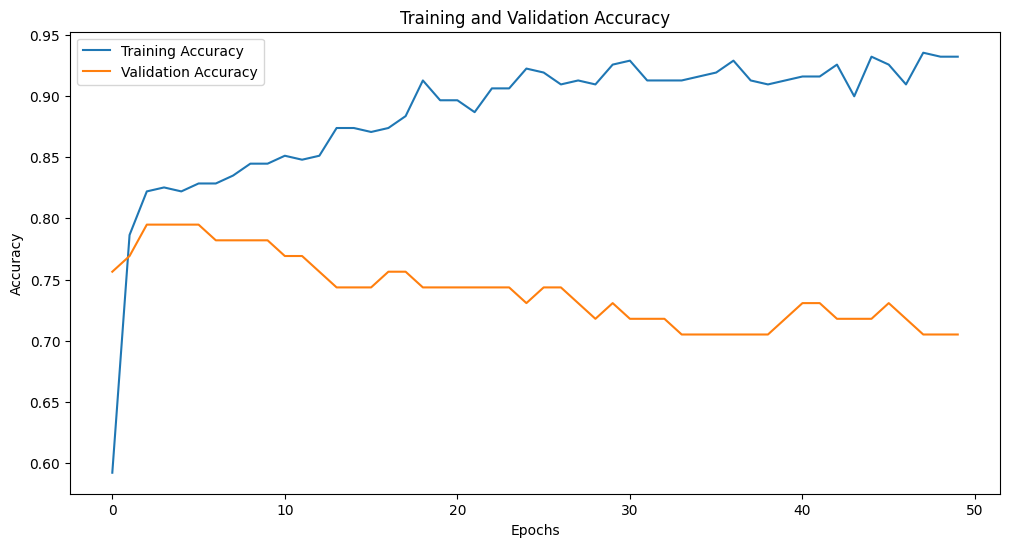

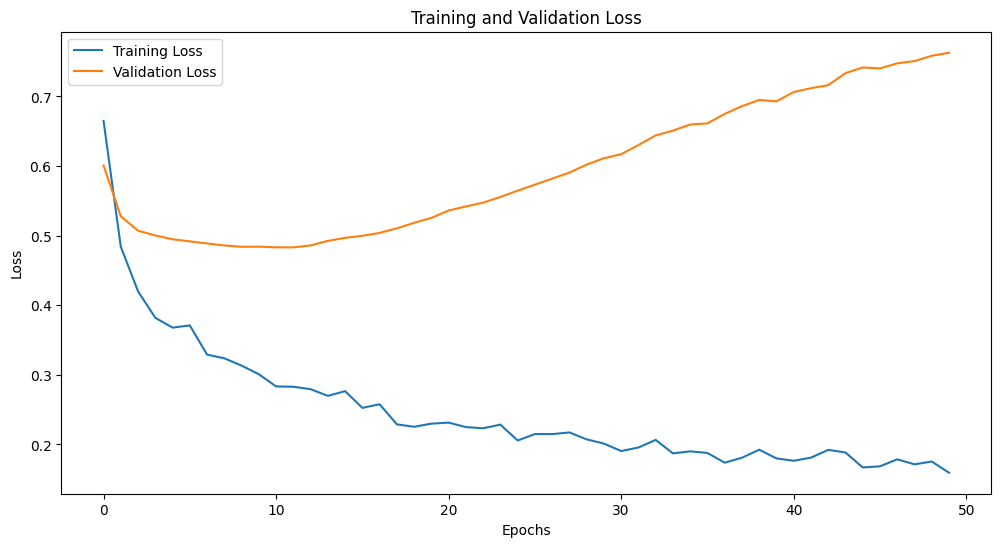

Test Loss: 0.3881
Test Accuracy: 0.8247


In [138]:
# neural network training
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Accuracy: 0.82
Precision: 0.89
Recall: 0.90
F1-Score: 0.89
AUC-ROC: 0.86
              precision    recall  f1-score   support

           0       0.53      0.50      0.51        18
           1       0.89      0.90      0.89        79

    accuracy                           0.82        97
   macro avg       0.71      0.70      0.70        97
weighted avg       0.82      0.82      0.82        97



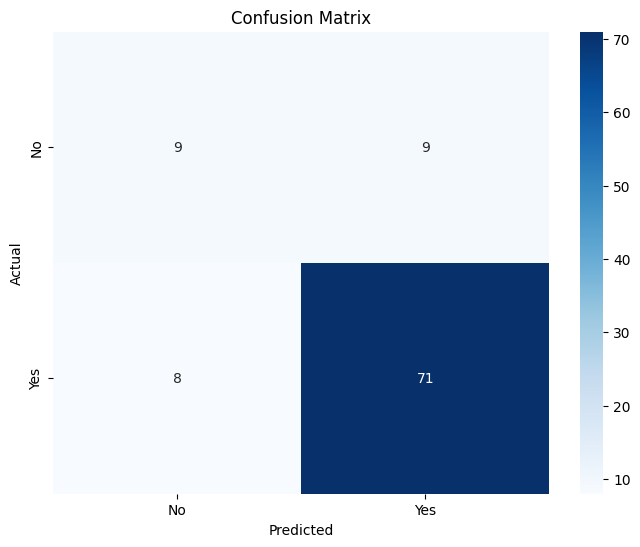

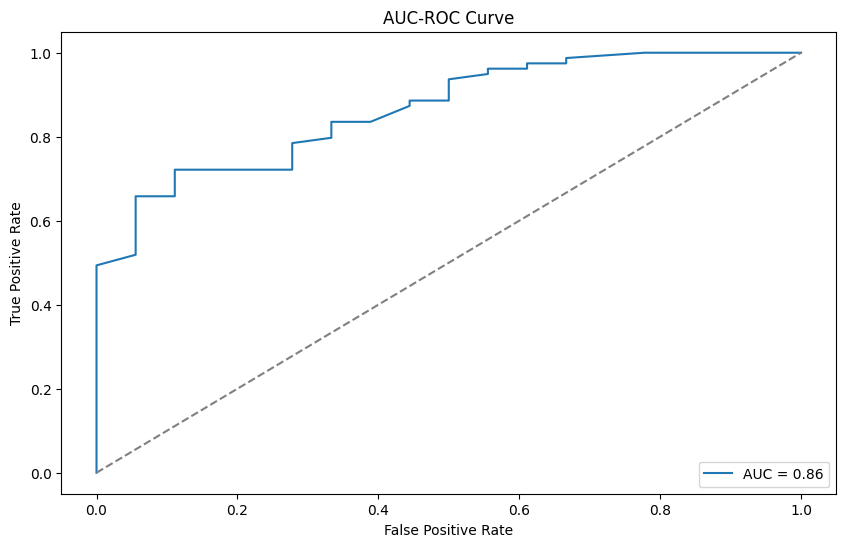

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# probabilities on the test set
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)  # probabilities converting to class predictions

# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

print(classification_report(y_test, y_pred))

# confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
